In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

%matplotlib inline

In [17]:
def printLines(file, n=10):
    with open(file, 'rb') as datafile:
        lines = datafile.readlines()
        print(len(lines))
    for line in lines[:n]:
        print(line)
rainfall_data = os.path.join("data", "kenya-climate-data-1991-2016-rainfallmm.csv")
temp_data = os.path.join("data", "kenya-climate-data-1991-2016-temp-degrees-celcius.csv")

printLines(rainfall_data)
printLines(temp_data)

rainfall_df = pd.read_csv(rainfall_data)
temp_df = pd.read_csv(temp_data)

# convert to pandas dataframe
# rainfall_data = pd.DataFrame(rainfall_data)
# temp_data = pd.DataFrame(temp_data)

313
b'Year,Month Average,Rainfall - (MM)\r\n'
b'1991,Jan Average,38.2847\r\n'
b'1991,Feb Average,12.7492\r\n'
b'1991,Mar Average,73.3656\r\n'
b'1991,Apr Average,83.135\r\n'
b'1991,May Average,112.275\r\n'
b'1991,Jun Average,33.6106\r\n'
b'1991,Jul Average,36.6575\r\n'
b'1991,Aug Average,32.8066\r\n'
b'1991,Sep Average,18.3184\r\n'
313
b'Year,Month Average,Temperature - (Celsius)\r\n'
b'1991,Jan Average,25.1631\r\n'
b'1991,Feb Average,26.0839\r\n'
b'1991,Mar Average,26.2236\r\n'
b'1991,Apr Average,25.5812\r\n'
b'1991,May Average,24.6618\r\n'
b'1991,Jun Average,23.9439\r\n'
b'1991,Jul Average,22.9982\r\n'
b'1991,Aug Average,23.0391\r\n'
b'1991,Sep Average,23.9423\r\n'


In [18]:
temp_df

,Year,Month Average,Temperature - (Celsius)
0,1991,Jan Average,25.1631
1,1991,Feb Average,26.0839
2,1991,Mar Average,26.2236
3,1991,Apr Average,25.5812
4,1991,May Average,24.6618
...,...,...,...
307,2016,Aug Average,24.0942
308,2016,Sep Average,24.4370
309,2016,Oct Average,26.0317
310,2016,Nov Average,25.5692


In [19]:
temp = temp_df["Temperature - (Celsius)"].astype("float32")
temp

0      25.163099
1      26.083900
2      26.223600
3      25.581200
4      24.661800
         ...    
307    24.094200
308    24.437000
309    26.031700
310    25.569201
311    25.740101
Name: Temperature - (Celsius), Length: 312, dtype: float32

In [20]:
rainfall_df["Rainfall - (MM)"] = rainfall_df["Rainfall - (MM)"].astype("float32")
rainfall_df["Rainfall - (MM)"]

0       38.284698
1       12.749200
2       73.365601
3       83.135002
4      112.275002
          ...    
307     25.534201
308     15.142800
309     40.005501
310    121.997002
311    100.261002
Name: Rainfall - (MM), Length: 312, dtype: float32

In [21]:
weather_df = rainfall_df.join(temp)
weather_df

,Year,Month Average,Rainfall - (MM),Temperature - (Celsius)
0,1991,Jan Average,38.284698,25.163099
1,1991,Feb Average,12.749200,26.083900
2,1991,Mar Average,73.365601,26.223600
3,1991,Apr Average,83.135002,25.581200
4,1991,May Average,112.275002,24.661800
...,...,...,...,...
307,2016,Aug Average,25.534201,24.094200
308,2016,Sep Average,15.142800,24.437000
309,2016,Oct Average,40.005501,26.031700
310,2016,Nov Average,121.997002,25.569201


In [7]:
avg_expenditure = np.random.uniform(100, 150, size=(313,))
avg_expenditure = avg_expenditure.astype("float32")
avg_expenditure = {"Average Expenditure - ($)": avg_expenditure}
avg_expenditure_df = pd.DataFrame(avg_expenditure)
avg_expenditure_df

,Average Expenditure - ($)
0,128.005280
1,149.618515
2,108.476051
3,130.082108
4,106.565750
...,...
308,114.604225
309,106.770042
310,133.558197
311,115.842346


In [40]:
dates = pd.date_range(start='1991-01-01', end='2016-12-31', freq='M')
print(len(dates))
dates

312


DatetimeIndex(['1991-01-31', '1991-02-28', '1991-03-31', '1991-04-30',
               '1991-05-31', '1991-06-30', '1991-07-31', '1991-08-31',
               '1991-09-30', '1991-10-31',
               ...
               '2016-03-31', '2016-04-30', '2016-05-31', '2016-06-30',
               '2016-07-31', '2016-08-31', '2016-09-30', '2016-10-31',
               '2016-11-30', '2016-12-31'],
              dtype='datetime64[ns]', length=312, freq='M')

In [41]:
exp_df = pd.DataFrame({'Average Expenditure - ($)': np.random.uniform(100, 150, len(dates))}, index=dates)
exp_df

,Average Expenditure - ($)
1991-01-31,121.792061
1991-02-28,103.286840
1991-03-31,127.336787
1991-04-30,105.128656
1991-05-31,132.140328
...,...
2016-08-31,121.040063
2016-09-30,121.029718
2016-10-31,120.667540
2016-11-30,116.400857


In [42]:
high_months = [7, 8, 12]
exp_df.loc[exp_df.index.month.isin(high_months), 'Average Expenditure - ($)'] *= 1.5
exp_df

,Average Expenditure - ($)
1991-01-31,121.792061
1991-02-28,103.286840
1991-03-31,127.336787
1991-04-30,105.128656
1991-05-31,132.140328
...,...
2016-08-31,181.560095
2016-09-30,121.029718
2016-10-31,120.667540
2016-11-30,116.400857


In [43]:
exp_df.astype("float32")

,Average Expenditure - ($)
1991-01-31,121.792061
1991-02-28,103.286842
1991-03-31,127.336784
1991-04-30,105.128654
1991-05-31,132.140335
...,...
2016-08-31,181.560089
2016-09-30,121.029716
2016-10-31,120.667542
2016-11-30,116.400856


In [44]:
exp_df["Average Expenditure - ($)"]

1991-01-31    121.792061
1991-02-28    103.286840
1991-03-31    127.336787
1991-04-30    105.128656
1991-05-31    132.140328
                 ...    
2016-08-31    181.560095
2016-09-30    121.029718
2016-10-31    120.667540
2016-11-30    116.400857
2016-12-31    163.726044
Freq: M, Name: Average Expenditure - ($), Length: 312, dtype: float64

In [48]:
exp_df = exp_df.reset_index()
exp_df

,index,Average Expenditure - ($)
0,1991-01-31,121.792061
1,1991-02-28,103.286840
2,1991-03-31,127.336787
3,1991-04-30,105.128656
4,1991-05-31,132.140328
...,...,...
307,2016-08-31,181.560095
308,2016-09-30,121.029718
309,2016-10-31,120.667540
310,2016-11-30,116.400857


In [49]:
month_dummies = pd.get_dummies(weather_df["Month Average"])
month_dummies

,Apr Average,Aug Average,Dec Average,Feb Average,Jan Average,Jul Average,Jun Average,Mar Average,May Average,Nov Average,Oct Average,Sep Average
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
307,0,1,0,0,0,0,0,0,0,0,0,0
308,0,0,0,0,0,0,0,0,0,0,0,1
309,0,0,0,0,0,0,0,0,0,0,1,0
310,0,0,0,0,0,0,0,0,0,1,0,0


In [50]:
weather_cost_df =weather_df.join(month_dummies)
weather_cost_df

,Year,Month Average,Rainfall - (MM),Temperature - (Celsius),Apr Average,Aug Average,Dec Average,Feb Average,Jan Average,Jul Average,Jun Average,Mar Average,May Average,Nov Average,Oct Average,Sep Average
0,1991,Jan Average,38.284698,25.163099,0,0,0,0,1,0,0,0,0,0,0,0
1,1991,Feb Average,12.749200,26.083900,0,0,0,1,0,0,0,0,0,0,0,0
2,1991,Mar Average,73.365601,26.223600,0,0,0,0,0,0,0,1,0,0,0,0
3,1991,Apr Average,83.135002,25.581200,1,0,0,0,0,0,0,0,0,0,0,0
4,1991,May Average,112.275002,24.661800,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,2016,Aug Average,25.534201,24.094200,0,1,0,0,0,0,0,0,0,0,0,0
308,2016,Sep Average,15.142800,24.437000,0,0,0,0,0,0,0,0,0,0,0,1
309,2016,Oct Average,40.005501,26.031700,0,0,0,0,0,0,0,0,0,0,1,0
310,2016,Nov Average,121.997002,25.569201,0,0,0,0,0,0,0,0,0,1,0,0


In [51]:
weather_cost_df = weather_cost_df.join(exp_df['Average Expenditure - ($)'])
weather_cost_df

,Year,Month Average,Rainfall - (MM),Temperature - (Celsius),Apr Average,Aug Average,Dec Average,Feb Average,Jan Average,Jul Average,Jun Average,Mar Average,May Average,Nov Average,Oct Average,Sep Average,Average Expenditure - ($)
0,1991,Jan Average,38.284698,25.163099,0,0,0,0,1,0,0,0,0,0,0,0,121.792061
1,1991,Feb Average,12.749200,26.083900,0,0,0,1,0,0,0,0,0,0,0,0,103.286840
2,1991,Mar Average,73.365601,26.223600,0,0,0,0,0,0,0,1,0,0,0,0,127.336787
3,1991,Apr Average,83.135002,25.581200,1,0,0,0,0,0,0,0,0,0,0,0,105.128656
4,1991,May Average,112.275002,24.661800,0,0,0,0,0,0,0,0,1,0,0,0,132.140328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,2016,Aug Average,25.534201,24.094200,0,1,0,0,0,0,0,0,0,0,0,0,181.560095
308,2016,Sep Average,15.142800,24.437000,0,0,0,0,0,0,0,0,0,0,0,1,121.029718
309,2016,Oct Average,40.005501,26.031700,0,0,0,0,0,0,0,0,0,0,1,0,120.667540
310,2016,Nov Average,121.997002,25.569201,0,0,0,0,0,0,0,0,0,1,0,0,116.400857


In [52]:
final_df = weather_cost_df.drop(["Month Average", "Jan Average"], axis="columns")
final_df

,Year,Rainfall - (MM),Temperature - (Celsius),Apr Average,Aug Average,Dec Average,Feb Average,Jul Average,Jun Average,Mar Average,May Average,Nov Average,Oct Average,Sep Average,Average Expenditure - ($)
0,1991,38.284698,25.163099,0,0,0,0,0,0,0,0,0,0,0,121.792061
1,1991,12.749200,26.083900,0,0,0,1,0,0,0,0,0,0,0,103.286840
2,1991,73.365601,26.223600,0,0,0,0,0,0,1,0,0,0,0,127.336787
3,1991,83.135002,25.581200,1,0,0,0,0,0,0,0,0,0,0,105.128656
4,1991,112.275002,24.661800,0,0,0,0,0,0,0,1,0,0,0,132.140328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,2016,25.534201,24.094200,0,1,0,0,0,0,0,0,0,0,0,181.560095
308,2016,15.142800,24.437000,0,0,0,0,0,0,0,0,0,0,1,121.029718
309,2016,40.005501,26.031700,0,0,0,0,0,0,0,0,0,1,0,120.667540
310,2016,121.997002,25.569201,0,0,0,0,0,0,0,0,1,0,0,116.400857


In [55]:
X = final_df.drop(['Year', 'Average Expenditure - ($)'], axis='columns')
X

,Rainfall - (MM),Temperature - (Celsius),Apr Average,Aug Average,Dec Average,Feb Average,Jul Average,Jun Average,Mar Average,May Average,Nov Average,Oct Average,Sep Average
0,38.284698,25.163099,0,0,0,0,0,0,0,0,0,0,0
1,12.749200,26.083900,0,0,0,1,0,0,0,0,0,0,0
2,73.365601,26.223600,0,0,0,0,0,0,1,0,0,0,0
3,83.135002,25.581200,1,0,0,0,0,0,0,0,0,0,0
4,112.275002,24.661800,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,25.534201,24.094200,0,1,0,0,0,0,0,0,0,0,0
308,15.142800,24.437000,0,0,0,0,0,0,0,0,0,0,1
309,40.005501,26.031700,0,0,0,0,0,0,0,0,0,1,0
310,121.997002,25.569201,0,0,0,0,0,0,0,0,1,0,0


In [56]:
y = final_df['Average Expenditure - ($)']
y

0      121.792061
1      103.286840
2      127.336787
3      105.128656
4      132.140328
          ...    
307    181.560095
308    121.029718
309    120.667540
310    116.400857
311    163.726044
Name: Average Expenditure - ($), Length: 312, dtype: float64

In [57]:
from sklearn.linear_model import LinearRegression

model1 = LinearRegression()
model1.fit(X, y)

LinearRegression()

In [58]:
model1.coef_

array([-2.26097070e-02, -2.96384811e-01,  2.43636236e-01,  4.97487106e+01,
        5.14513054e+01, -2.45971251e+00,  6.19931831e+01, -2.90656710e+00,
        1.09853804e-01, -2.29890037e+00, -1.83831048e+00,  3.52384520e+00,
        8.71515453e-01], dtype=float32)

In [59]:
model1.intercept_

134.2007

In [65]:
model1.predict(np.array([[53, 24, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]]))

C:\Users\bowen\PycharmProjects\first-ml\venv\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([123.4294364])

In [66]:
import pickle
with open('weather_model_two.pkl', 'wb') as file:
    pickle.dump(model1, file)

In [63]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression();
reg.fit(weather_cost_df[['Rainfall - (MM)', 'Temperature - (Celsius)', ]], weather_cost_df['Average Expenditure - ($)'])

LinearRegression()

In [64]:
reg.coef_

array([0.00669825, 0.94432867], dtype=float32)

In [65]:
reg.intercept_

101.710754

In [66]:
reg.predict([[100, 25]])

C:\Users\bowen\PycharmProjects\first-ml\venv\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([125.98879579])

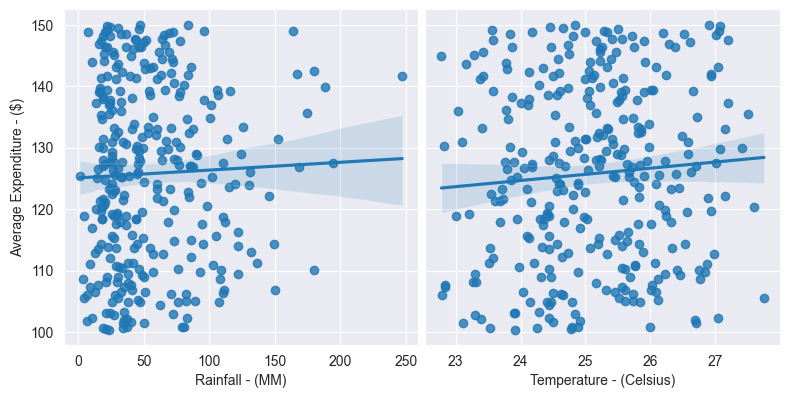

In [68]:
# figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14,4), sharey=True)
# bp1 = sns.barplot(data=weather_cost_df, x='Rainfall - (MM)', y='Average Expenditure - ($)', hue='Year', ax=ax1)
# bp2 = sns.barplot(data=weather_cost_df, x='Temperature - (Celsius)', y='Average Expenditure - ($)', hue='Year', ax=ax2)

pp = sns.pairplot(data=weather_cost_df,
y_vars=['Average Expenditure - ($)'],
x_vars=['Rainfall - (MM)', 'Temperature - (Celsius)'],
kind='reg',
height=4)

In [69]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

x = weather_cost_df[['Rainfall - (MM)', 'Temperature - (Celsius)']]
y = weather_cost_df['Average Expenditure - ($)']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1)
y_train = le.fit_transform(y_train)
classifier = xgb.sklearn.XGBClassifier(nthread=-1, seed=1)
classifier.fit(X = X_train, y = y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, nthread=-1, num_parallel_tree=None,
              objective='multi:softprob', ...)

In [70]:
from sklearn.metrics import r2_score, explained_variance_score, mean_absolute_error

In [71]:
arr = np.array([[23, 33]]).astype("float32")
arr

array([[23., 33.]], dtype=float32)

In [72]:
classifier.predict(arr)

array([0], dtype=int64)

In [73]:
import pickle
with open('weather_model.pkl', 'wb') as file:
    pickle.dump(reg, file)